In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 10,8

Text(0, 0.5, 'y')

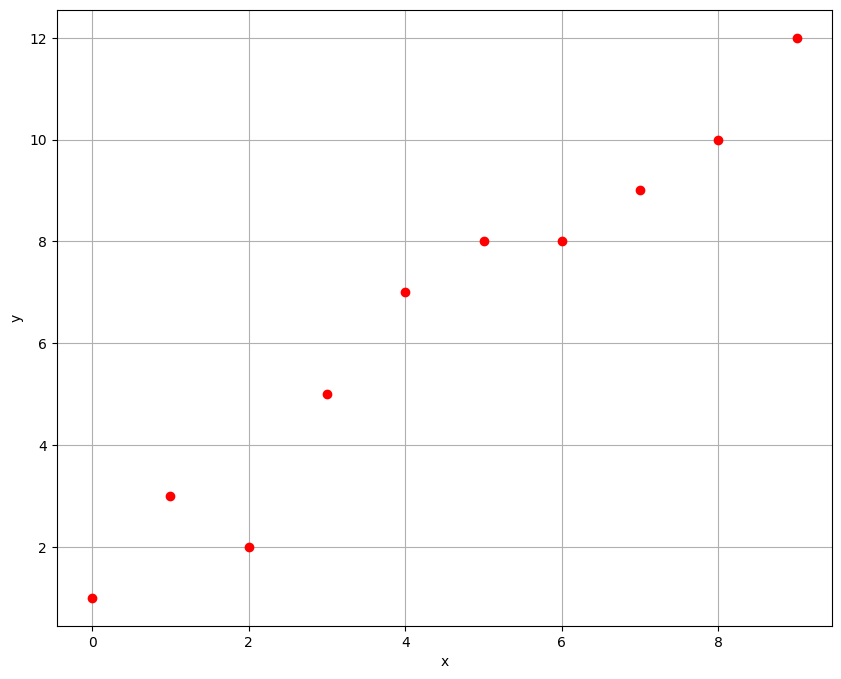

In [89]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

plt.plot(x, y, 'ro')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

h(x 
i
​
 )=β 
0
​
 +β 
1
​
 x
 
 
 
 
 
 
 
 
 
 
 y 
i
​
 =β 
0
​
 +β 
1
​
 x 
i
​
 +ε 
i
​
 =h(x 
i
​
 )+ε 
i
​
 ⇒ε 
i
​
 =y 
i
​
 −h(x 
i
​
 ) 

1.3322676295501878e-16
1.7749370367472766e-31

0.6169696969696968
0.5624242424242423
Estimate_coef:  
 B_0: 1.2363636363636363 
 B_1: 1.1696969696969697
None


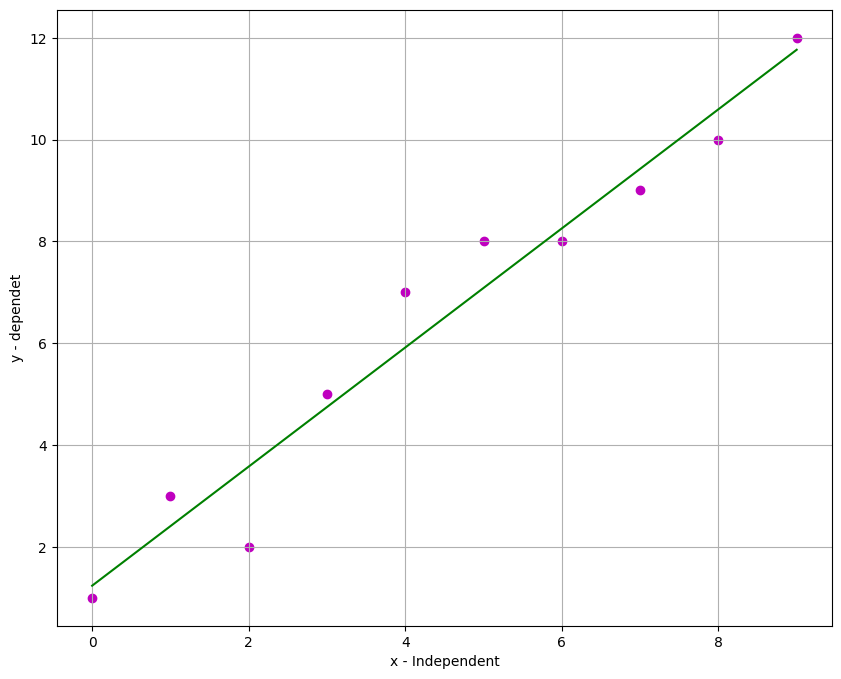

In [10]:

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])




def estimate_coef(x, y):
    
    n = np.size(x)
    
    m_x = np.mean(x)
    m_y = np.mean(y)
    
    SS_xy = np.sum(x * y) - n * m_x * m_y
    SS_xx = np.sum(x * x) - n * m_x * m_x
    
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    
    return (b_0, b_1)


  
def plot_regression_line(x, y, b):
    
    plt.scatter(x, y, color='m', marker='o')
 
    y_pred = b[0] + b[1] * x
    
    plt.plot(x, y_pred, 'g')
    plt.grid(True)
    plt.xlabel('x - Independent')
    plt.ylabel('y - dependet')
    
    print(sum((y - y_pred)) / len(x))
    print(sum((y - y_pred))**2 / len(x))
    print()
    print(mean_absolute_error(y, y_pred))
    print(mean_squared_error(y, y_pred))
    

def m(x, y):
       
    b = estimate_coef(x, y)
    p = plot_regression_line(x, y, b)
    
    print(f'Estimate_coef:  \n B_0: {b[0]} \n B_1: {b[1]}')
    return p


if __name__ == '__main__':
    print(m(x, y))

--------------

In [8]:

da = pd.read_csv('housing.csv', sep='\s+', skiprows=22, header=None)
da

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
1,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88,14.5
2,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,394.33,16.30,15.6
3,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
4,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
480,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
481,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
482,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [15]:
from sklearn.model_selection import train_test_split

X = np.hstack([da.values[::2, :], da.values[1::2, :2]])

Y = da.values[1::2, 2]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
print(f'Coeff: \n {reg.coef_}')

Coeff: 
 [ 2.32612418e-03  2.22619228e-02  8.71237932e-01  1.84091952e-01
  5.46838090e+00 -7.45018128e-02 -3.01282588e-03  1.63505640e-01
  1.42076192e-01 -4.74759081e-03 -1.41465037e-01 -1.35032815e-04
 -7.47695285e-04  4.22405109e-03  6.89661072e-03 -3.16932608e-02]


In [26]:
print(f'Variance score: {reg.score(X_test, y_test)}')

Variance score: 0.9602231297443091


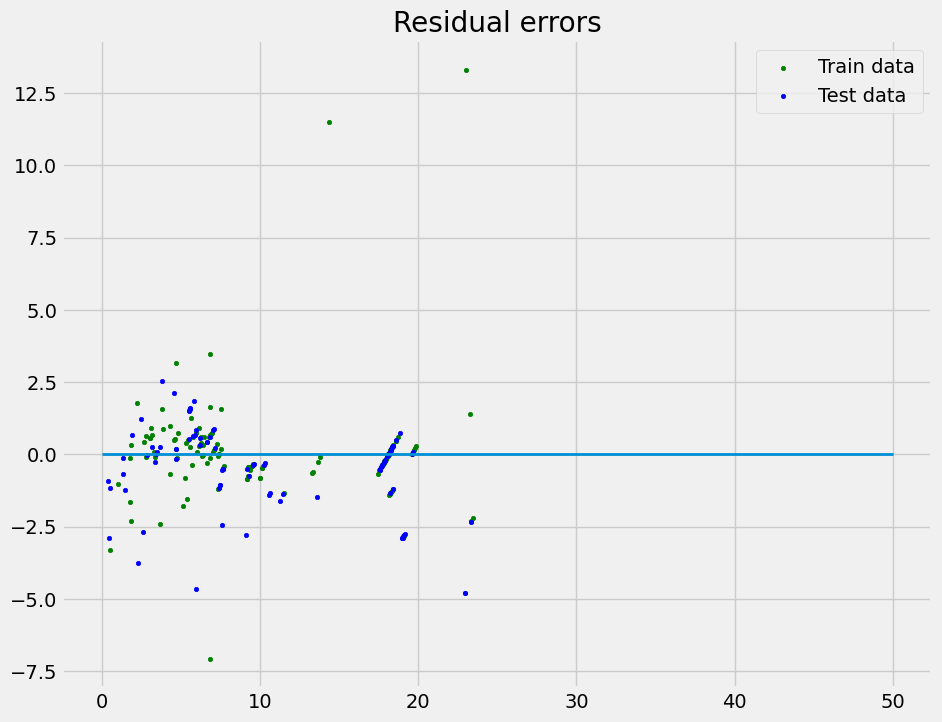

In [47]:
plt.style.use('fivethirtyeight') 

plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color="green", s=10, label='Train data') 

plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color="blue", s=10, label='Test data') 

plt.hlines(y=0, xmin=0, xmax=50, linewidth=2) 

plt.legend(loc='upper right') 

plt.title("Residual errors") 

plt.show() 


----------------

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd


df = pd.DataFrame({'x':[0, 1.1, 2.3, 3, 4.1, 4.8, 5, 5.5, 6.3, 7], 'y': [-7, -6.2, -5.5, -3, -2.3, 1, 0, -0.5, 3, 4]})



m,b = 1,1
nu = 0.1
n = 250

df = df[['x','y']].copy()
df['y_pred'] = m * df['x'] + b
for i in range(n):
    
    
    df['m_change'] = df['x'] * np.sign(df['y'] - df['y_pred'])
    df['b_change'] = np.sign(df['y'] - df['y_pred'])


    m = m + nu * df['m_change'].mean()
    b = b + nu * df['b_change'].mean()

    df['y_pred'] = df['x'] * m + b
    df['err_abs'] = np.abs(df['y'] - df['y_pred'])
  
    if i % 10 == 0:
        print(df['err_abs'].mean())


4.931189999999999
3.41585
3.28775
3.1866499999999998
3.07055
2.9574499999999997
2.8533500000000007
2.7282499999999987
2.6321499999999984
2.4990499999999987
2.402949999999999
2.2768500000000005
2.1737499999999983
2.0596500000000013
1.9445499999999978
1.8424500000000017
1.7153499999999984
1.6192499999999987
1.4861499999999992
1.39005
1.2659500000000026
1.160850000000001
1.048750000000003
0.9316500000000023
0.8595500000000008


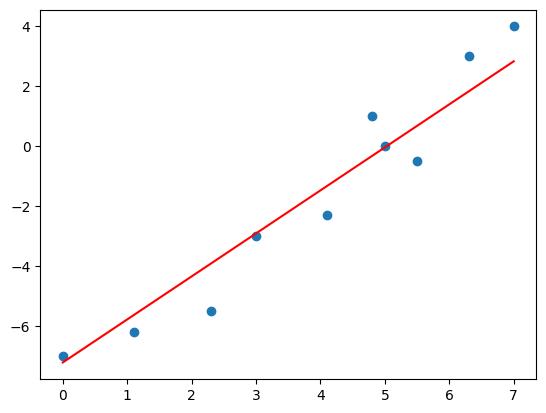

In [107]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'], c='r')